In [7]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# PARAMS
DATA_PATH = '../data'
F_SWISSVOTE = 'intermediate/swissvotes.csv'
F_TOPICS = 'processed/summary_topics.csv'

BEGIN_ID = 316.0
END_ID = 663.0

## Topic Model Analysis

In [9]:
# Domains
topic_domain_manifesto = {
    1: 'External Relations',
    2: 'Freedom and Democracy',
    3: 'Political System',
    4: 'Economy',
    5: 'Welfare and Quality of Life',
    6: 'Fabric of Society',            
    7: 'Social Groups'
}

topic_domain_swissvotes = {
    0: 'Staatsordnung',
    1: 'Aussenpolitik',
    2: 'Sicherheitspolitik',
    3: 'Wirtschaft',
    4: 'Landwirtschaft',
    5: 'Öffentliche Finanzen',
    6: 'Energie',
    7: 'Verkehr und Infrastruktur',
    8: 'Umwelt und Lebensraum',
    9: 'Sozialpolitik',
    10: 'Bildung und Forschung',
    11: 'Kultur, Religion, Medien'
}

mapping_swissvote_topic_domain = {
    1 : [3],
    2 : [1],
    3 : [1, 3],
    4 : [4],
    5 : [4],
    6 : [4],
    7 : [4, 5],
    8 : [4, 5],
    9 : [5, 6],
    10: [5, 7],
    11: [5, 6],
    12: [6, 7]
}

In [10]:
topic_df = pd.read_csv(os.path.join(DATA_PATH, F_TOPICS), index_col='id').sort_index()
top_3_values = topic_df.apply(lambda s: s.abs().nlargest(3).index.to_list(), axis=1)
topic_df[['topic1','topic2', 'topic3']] = pd.DataFrame(top_3_values.tolist(), index= topic_df.index)    
topic_df['main_topic'] = topic_df['topic1'].apply(lambda x: topic_domain_manifesto[int(x[0])])
topic_df['main_topic_id'] = topic_df['topic1'].apply(lambda x: int(x[0]))
topic_df.describe()



,107 - Internationalism: Positive,109 - Internationalism: Negative,201 - Freedom and Human Rights,601 - National Way of Life: Positive,303 - Governmental and Administrative Efficiency,416 - Anti-Growth Economy: Positive,108 - European Community/Union: Positive,503 - Equality: Positive,106 - Peace,606 - Civic Mindedness: Positive,...,507 - Education Limitation,604 - Traditional Morality: Negative,607 - Multiculturalism: Positive,608 - Multiculturalism: Negative,701 - Labour Groups: Positive,702 - Labour Groups: Negative,703 - Agriculture and Farmers: Positive,704 - Middle Class and Professional Groups,705 - Underprivileged Minority Groups,main_topic_id
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,...,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,1.662203,0.668897,2.008504,1.689704,4.762175,1.525871,1.335802,3.932184,0.370043,0.481344,...,0.032339,2.681573,0.808567,1.095965,2.250988,0.225674,3.861627,0.239817,0.900599,4.341808
std,7.389218,2.749691,5.956724,5.509693,7.946179,4.404957,7.125584,8.600444,3.198461,1.254638,...,0.121013,10.813516,4.595554,5.184225,8.913374,1.018353,15.103585,1.151879,3.671855,1.641910
min,0.000000,0.000000,0.003125,0.007273,0.024444,0.000000,0.001765,0.010000,0.000000,0.005625,...,0.000000,0.000625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000714,0.000000,1.000000
25%,0.013125,0.011195,0.086594,0.061906,0.793536,0.018667,0.014375,0.127610,0.002207,0.055275,...,0.004563,0.013585,0.007010,0.010111,0.020000,0.008242,0.016038,0.015719,0.010667,4.000000
50%,0.039551,0.030943,0.220512,0.143158,1.710179,0.061937,0.030000,0.753688,0.005625,0.111955,...,0.011250,0.032566,0.014381,0.023344,0.074556,0.020000,0.037571,0.039643,0.032164,5.000000
75%,0.295240,0.092955,0.874125,0.471964,5.126231,0.614737,0.070938,3.489479,0.016607,0.238258,...,0.021497,0.230568,0.054000,0.094904,0.410000,0.060833,0.097909,0.115824,0.164250,5.000000
max,70.492400,26.251818,51.159091,44.984444,54.831667,34.348235,81.822353,85.095455,51.511765,9.951250,...,1.753182,84.422500,70.118462,56.482941,71.708182,8.660000,91.604375,17.135714,42.430000,7.000000


## Visualisation

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


def create_min_count_pie(df, min_count, column_name, label_func = None, title=''):
    # Calculate the counts for the specified column
    counts = df[column_name].value_counts()

    # Adjust the counts to only keep those that have a count of min_count or higher
    adjusted_counts = counts[counts >= min_count]

    # Group the rest as "other"
    other_count = counts[counts < min_count].sum()
    if other_count > 0:
        adjusted_counts['other'] = other_count
    
    if label_func:
        labels = [label_func[str(id)] for id in adjusted_counts.index]
    else:
        labels = adjusted_counts.index

    # Plot the adjusted counts as a pie chart
    plt.pie(adjusted_counts, labels=labels, startangle=90, counterclock=False, autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 5 else '', pctdistance=0.8)
    plt.title(title)
    plt.show()

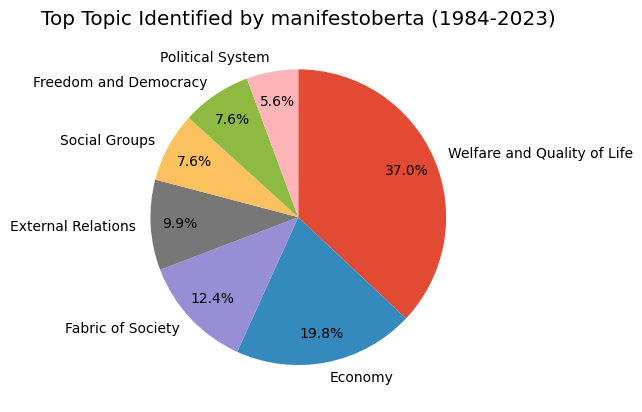

In [12]:
create_min_count_pie(topic_df, 10, 'main_topic', title='Top Topic Identified by manifestoberta (1984-2023)')

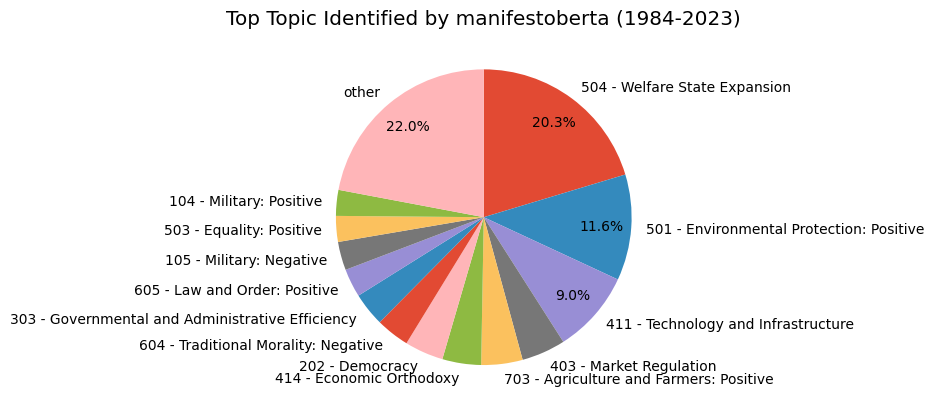

In [13]:
create_min_count_pie(topic_df, 10, 'topic1', title='Top Topic Identified by manifestoberta (1984-2023)')

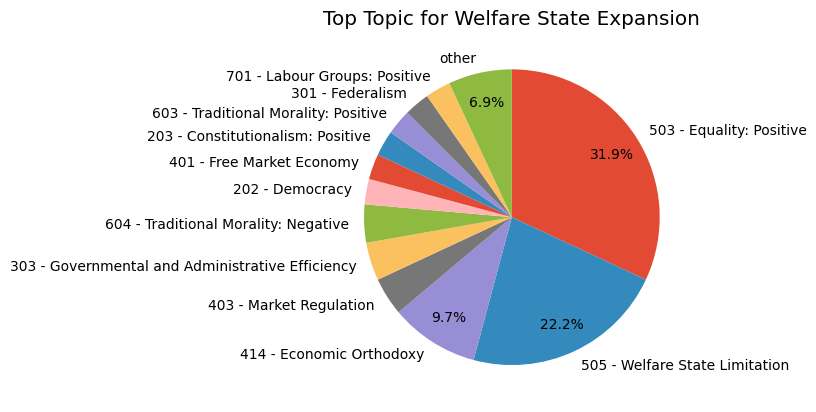

In [14]:
topic_welfare = topic_df.loc[topic_df['topic1'] == '504 - Welfare State Expansion']
create_min_count_pie(topic_welfare, 2, 'topic2', title='Top Topic for Welfare State Expansion')

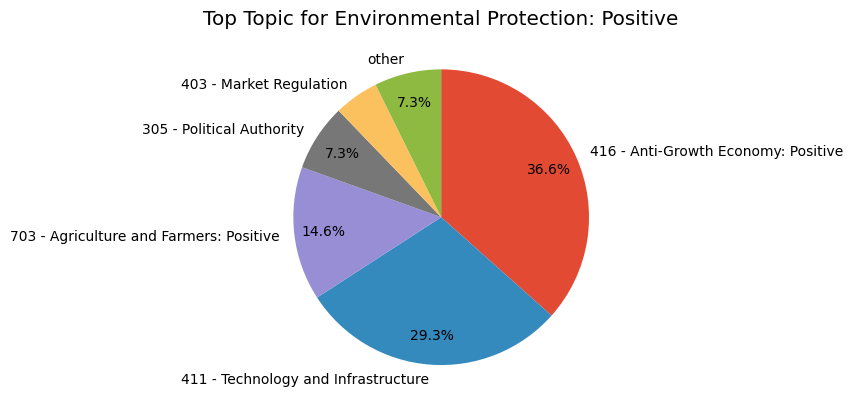

In [15]:
topic_welfare = topic_df.loc[topic_df['topic1'] == '501 - Environmental Protection: Positive']
create_min_count_pie(topic_welfare, 2, 'topic2', title='Top Topic for Environmental Protection: Positive')

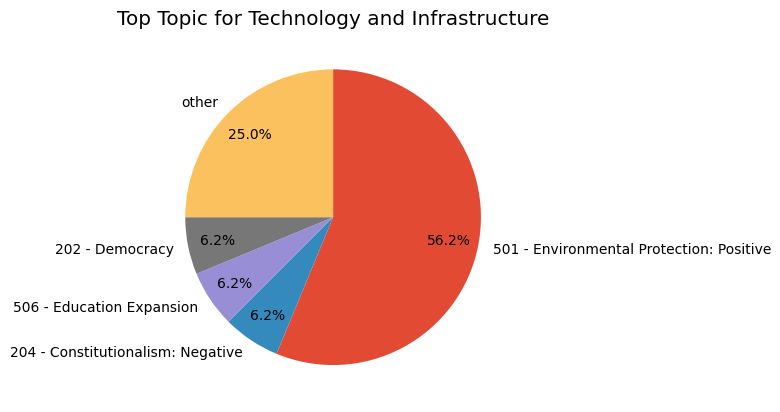

In [16]:
topic_welfare = topic_df.loc[topic_df['topic1'] == '411 - Technology and Infrastructure']
create_min_count_pie(topic_welfare, 2, 'topic2', title='Top Topic for Technology and Infrastructure')

# Swissvote Topic Analysis

In [17]:
swissvote_df = pd.read_csv(os.path.join(DATA_PATH, F_SWISSVOTE))
swissvote_df['datum'] = pd.to_datetime(swissvote_df['datum'], format='%d.%m.%Y')
swissvote_df['year'] = pd.DatetimeIndex(swissvote_df['datum']).year



# Set index to shifted anr
swissvote_df['anr'] /= 10
swissvote_df = swissvote_df.set_index('anr')
swissvote_df.rename({'anr':'id'})

swissvote_topics = swissvote_df.loc[BEGIN_ID:END_ID, [
                "datum",
                "year",
                "d1e1",
                "d1e2",
                "d1e3",
                "d2e1",
                "d2e2",
                "d2e3",
                "d3e1",
                "d3e2",
                "d3e3",
            ]]

In [18]:
# Create mapping
data = {
    'id2l': '1 Staatsordnung\n1.1 Nationale Identität\n1.2 Politisches System\n1.2.1 Bundesverfassung\n1.2.2 Verfassungsgebungsverfahren\n1.2.3 Gesetzgebungsverfahren\n1.2.4 Wahlsystem\n1.3 Institutionen\n1.3.1 Regierung, Verwaltung\n1.3.2 Parlament\n1.3.3 Gerichte\n1.3.4 Nationalbank\n1.4 Volksrechte\n1.4.1 Initiative\n1.4.2 Referendum\n1.4.3 Stimmrecht\n1.5 Föderalismus\n1.5.1 Territorialfragen\n1.5.2 Beziehungen zwischen Bund und Kantonen\n1.5.3 Aufgabenteilung\n1.6 Rechtsordnung\n1.6.1 Internationales Recht\n1.6.2 Grundrechte\n1.6.3 Bürgerrecht\n1.6.4 Privatrecht\n1.6.5 Strafrecht\n1.6.6 Datenschutz\n2 Aussenpolitik\n2.1 Aussenpolitische Grundhaltung\n2.1.1 Neutralität\n2.1.2 Unabhängigkeit\n2.1.3 Gute Dienste\n2.2 Europapolitik\n2.2.1 EFTA\n2.2.2 EU\n2.2.3 EWR\n2.2.4 Andere europäische Organisationen\n2.3 Internationale Organisationen\n2.3.1 UNO\n2.3.2 Andere internationale Organisationen\n2.4 Entwicklungszusammenarbeit\n2.5 Staatsverträge mit einzelnen Staaten\n2.6 Aussenwirtschaftspolitik\n2.6.1 Exportförderung\n2.6.2 Zollwesen\n2.7 Diplomatie\n2.8 Auslandschweizer:innen\n3 Sicherheitspolitik\n3.1 Öffentliche Sicherheit\n3.1.1 Bevölkerungsschutz\n3.1.2 Staatsschutz\n3.1.3 Polizei\n3.2 Armee\n3.2.1 Armee (allgemein)\n3.2.2 Militärorganisation\n3.2.3 Rüstung\n3.2.4 Militäranlagen\n3.2.5 Dienstverweigerung, Zivildienst\n3.2.6 Armeeabschaffung\n3.2.7 Militärische Ausbildung\n3.2.8 Internationale Einsätze\n3.3 Landesversorgung\n4 Wirtschaft\n4.1 Wirtschaftspolitik\n4.1.1 Konjunkturpolitik\n4.1.2 Wettbewerbspolitik\n4.1.3 Strukturpolitik\n4.1.4 Preispolitik\n4.1.5 Konsumentenschutz\n4.1.6 Gesellschaftsrecht\n4.2 Arbeit und Beschäftigung\n4.2.1 Arbeitsbedingungen\n4.2.2 Arbeitszeit\n4.2.3 Sozialpartnerschaft\n4.2.4 Beschäftigungspolitik\n4.3 Finanzwesen\n4.3.1 Geld- und Währungspolitik\n4.3.2 Banken, Börsen, Versicherungen\n4.4 Freizeit und Tourismus\n4.4.1 Fremdenverkehr\n4.4.2 Hotellerie und Gastgewerbe\n4.4.3 Geldspiele\n5 Landwirtschaft\n5.1 Agrarpolitik\n5.2 Tierische Produktion\n5.3 Pflanzliche Produktion\n5.4 Forstwirtschaft\n5.5 Fischerei, Jagd, Haustiere\n6 Öffentliche Finanzen\n6.1 Steuerwesen\n6.1.1 Steuerpolitik\n6.1.2 Steuersystem\n6.1.3 Direkte Steuern\n6.1.4 Indirekte Steuern\n6.2 Finanzordnung\n6.3 Öffentliche Ausgaben\n6.4 Spar- und Sanierungsmassnahmen\n7 Energie\n7.1 Energiepolitik\n7.2 Kernenergie\n7.3 Wasserkraft\n7.4 Alternativenergien\n7.5 Erdöl, Gas\n8 Verkehr und Infrastruktur\n8.1 Verkehrspolitik\n8.1.1 Agglomerationsverkehr\n8.1.2 Transitverkehr\n8.2 Strassenverkehr\n8.2.1 Strassenbau\n8.2.2 Schwerverkehr\n8.3 Schienenverkehr\n8.3.1 Güterverkehr\n8.3.2 Personenverkehr\n8.4 Luftverkehr\n8.5 Schifffahrt\n8.6 Post\n8.7 Telekommunikation\n9 Umwelt und Lebensraum\n9.1 Boden\n9.1.1 Raumplanung\n9.1.2 Bodenrecht\n9.2 Wohnen\n9.2.1 Mietwesen\n9.2.2 Wohnungsbau, Wohneigentum\n9.3 Umwelt\n9.3.1 Umweltpolitik\n9.3.2 Lärmschutz\n9.3.3 Luftreinhaltung\n9.3.4 Gewässerschutz\n9.3.5 Bodenschutz\n9.3.6 Abfälle\n9.3.7 Natur- und Heimatschutz\n9.3.8 Tierschutz\n10 Sozialpolitik\n10.1 Gesundheit\n10.1.1 Gesundheitspolitik\n10.1.2 Medizinforschung und –technik\n10.1.3 Medikamente\n10.1.4 Suchtmittel\n10.1.5 Fortpflanzungsmedizin\n10.2 Sozialversicherungen\n10.2.1 Alters- und Hinterbliebenenversicherung\n10.2.2 Invalidenversicherung\n10.2.3 Berufliche Vorsorge\n10.2.4 Kranken- und Unfallversicherung\n10.2.5 Mutterschaftsversicherung\n10.2.6 Arbeitslosenversicherung\n10.2.7 Erwerbsersatzordnung\n10.2.8 Fürsorge\n10.3 Soziale Gruppen\n10.3.1 Ausländer:innen\n10.3.2 Flüchtlinge\n10.3.3 Stellung der Frau\n10.3.4 Familienpolitik\n10.3.5 Kinder und Jugendliche\n10.3.6 Senior:innen\n10.3.7 Behinderte\n10.3.8 Homosexuelle\n11 Bildung und Forschung\n11.1 Bildungspolitik\n11.2 Schulen\n11.3 Hochschulen\n11.4 Forschung\n11.4.1 Gentechnologie\n11.4.2 Tierversuche\n11.5 Berufsbildung\n12 Kultur, Religion, Medien\n12.1 Kulturpolitik\n12.2 Sprachpolitik\n12.3 Religion, Kirchen\n12.4 Sport\n12.5 Medien und Kommunikation\n12.5.1 Medienpolitik\n12.5.2 Presse\n12.5.3 Radio, Fernsehen, Elektronische Medien\n12.5.4 Medienfreiheit'
}
id2title = {id: title.strip() for id, title in [line.split(' ', 1) for line in data['id2l'].split('\n')]}
id2title['other'] = 'other'


## Visualisation

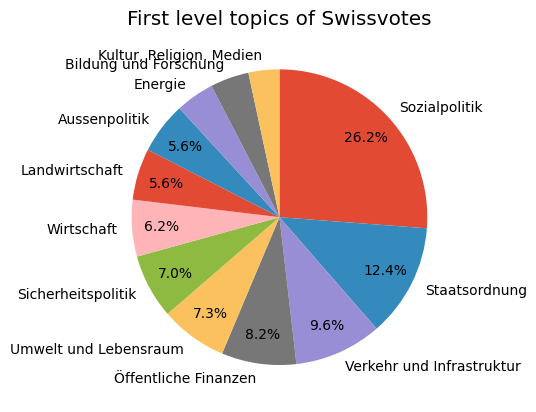

In [19]:
create_min_count_pie(swissvote_topics, 10, 'd1e1', id2title, title='First level topics of Swissvotes')

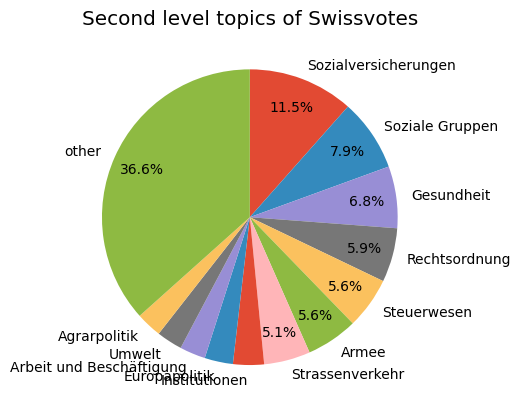

In [20]:
create_min_count_pie(swissvote_topics, 10, 'd1e2', id2title, title='Second level topics of Swissvotes')

<Axes: xlabel='year'>

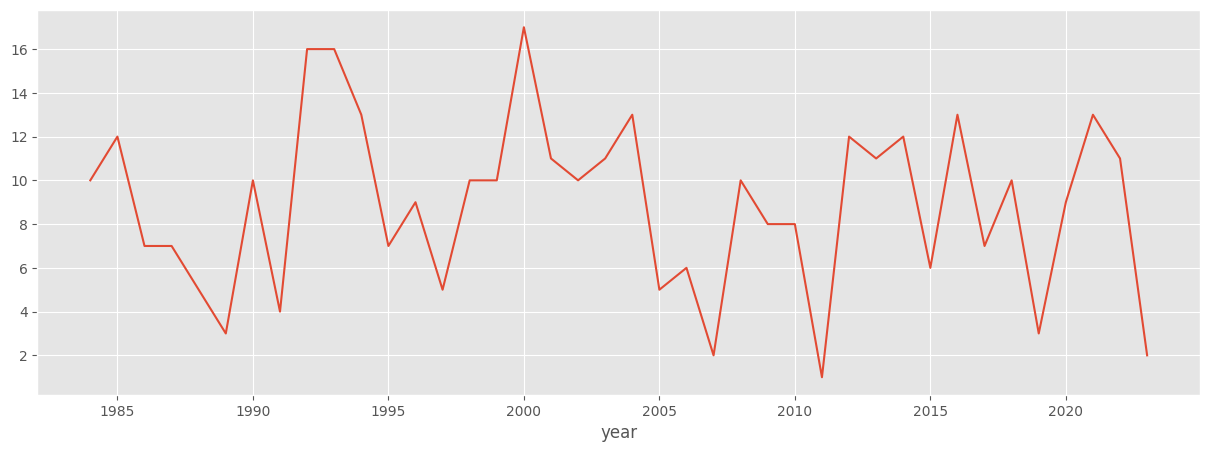

In [21]:
swissvote_topics.groupby(by='year').size().plot(kind='line', figsize=(15,5))

# Comparitave analysis


Checks if the main topic corresponds to the topics we found using the manifestoberta model. 

In [22]:
combined_df = pd.concat([swissvote_topics, topic_df.loc[:, 'topic1':'main_topic_id']], axis=1).dropna()
combined_df['d1e1'] = combined_df['d1e1'].astype(int)
combined_df['main_topic_id'] = combined_df['main_topic_id'].astype(int)

In [23]:
combined_df['mapping'] = combined_df.apply(lambda x: x['main_topic_id'] in mapping_swissvote_topic_domain.get(x['d1e1'], []), axis=1)

In [24]:
combined_df['mapping'].describe()

count      352
unique       2
top       True
freq       205
Name: mapping, dtype: object

/var/folders/rh/nnsrbcz93t711hn4wg6r4x300000gp/T/ipykernel_7682/1350437963.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(topic_domain_manifesto))


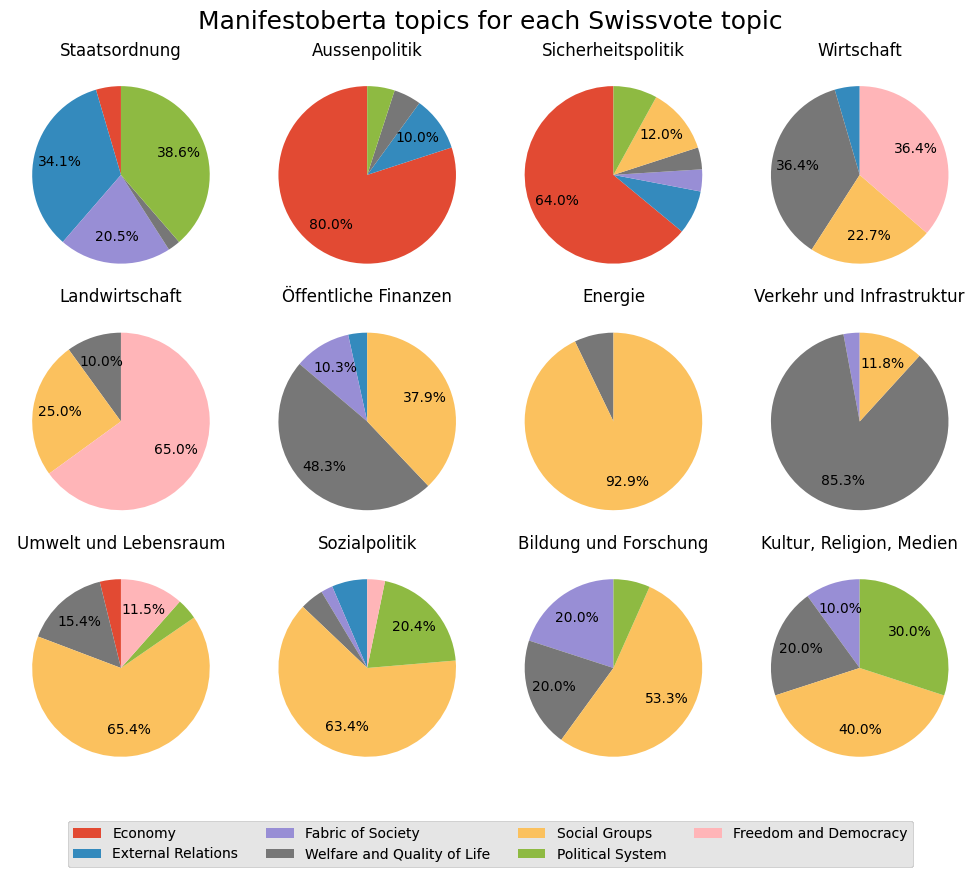

In [25]:
color_map = plt.cm.get_cmap('tab20', len(topic_domain_manifesto))
# Create a dictionary mapping main_topic to color
topic_color_map = {topic: color_map(i) for i, topic in enumerate(combined_df['main_topic'].unique())}

plotx = 3
ploty = 4
# Plot the pie charts with colored segments
fig, axs = plt.subplots(plotx, ploty, figsize=(10,8))

for i in range(plotx):
    for j in range(ploty):
        # Filter the combined_df based on d1e1 value
        filtered_df = combined_df.loc[combined_df['d1e1']-1 == (i * (plotx+1) + j)]
        count_dict = {val:0 for val in topic_domain_manifesto.keys()}
        for val in filtered_df['main_topic_id']:
            count_dict[val] +=1
        
        # Get the main_topic colors for the filtered_df
        colors = [topic_color_map[topic] for topic in filtered_df['main_topic']]
        
        # Plot the pie chart with colored segments and legend
        labels = [topic_domain_manifesto[key] for key in count_dict.keys()]
        axs[i,j].pie(count_dict.values(), startangle=90, counterclock=True, autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 10 else '', pctdistance=0.7)
        axs[i,j].set_title(topic_domain_swissvotes[i*(plotx+1)+j], fontsize = 12)
        
        labels = combined_df['main_topic'].unique()
        legend = fig.legend(labels, loc='lower center',  bbox_to_anchor=(0.5, -0.1), ncols=4)

fig.suptitle('Manifestoberta topics for each Swissvote topic', fontsize=18)
plt.tight_layout()
plt.show()



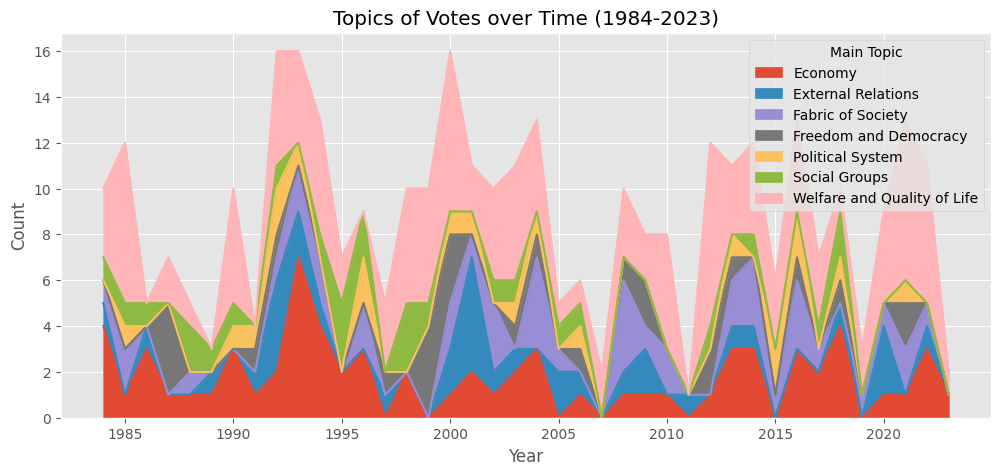

In [27]:
combined_df.groupby('year')['main_topic'].value_counts().unstack().plot.area(figsize=(12,5))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Topics of Votes over Time (1984-2023)')
plt.legend(title='Main Topic')
plt.show()